In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load and Display Data
df = pd.read_csv('C:/Users/KARAKORUM TRADERS/Downloads/covid_19_country_wise_latest.csv')  # Replace with actual dataset path
print(df.head())

   Unnamed: 0 Country/Region  Confirmed Deaths  Recovered  Active  New cases  \
0           0    Afghanistan      36263   1269      25198    9796      106.0   
1           1        Albania       4880    144       2745    1991      117.0   
2           2        Algeria      27973   1163      18837    7973      616.0   
3           3        Andorra        907     52        803      52       10.0   
4           4         Angola        950     41        242     667       18.0   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0        10.0             18                3.50                  69.49   
1         6.0             63                2.95                  56.25   
2         8.0            749                4.16                  67.34   
3         0.0              0                5.73                  88.53   
4         1.0              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0  

In [5]:
# 2. Set the Dataset index
df.set_index('Unnamed: 0', inplace=True)

In [13]:
df.head

<bound method NDFrame.head of            Country/Region  Confirmed Deaths  Recovered  Active  New cases  \
index                                                                       
0             Afghanistan      36263   1269      25198    9796      106.0   
1                 Albania       4880    144       2745    1991      117.0   
2                 Algeria      27973   1163      18837    7973      616.0   
3                 Andorra        907     52        803      52       10.0   
4                  Angola        950     41        242     667       18.0   
...                   ...        ...    ...        ...     ...        ...   
182    West Bank and Gaza      10621     78       3752    6791      152.0   
183        Western Sahara         10      1          8       1        0.0   
184                 Yemen       1691    483        833     375       10.0   
185                Zambia       4552    140       2815    1597       71.0   
186              Zimbabwe       2704    non   

In [9]:
# 3. Rename the index column
df.index.name = 'index'

In [15]:
df.head

<bound method NDFrame.head of            Country/Region  Confirmed Deaths  Recovered  Active  New cases  \
index                                                                       
0             Afghanistan      36263   1269      25198    9796      106.0   
1                 Albania       4880    144       2745    1991      117.0   
2                 Algeria      27973   1163      18837    7973      616.0   
3                 Andorra        907     52        803      52       10.0   
4                  Angola        950     41        242     667       18.0   
...                   ...        ...    ...        ...     ...        ...   
182    West Bank and Gaza      10621     78       3752    6791      152.0   
183        Western Sahara         10      1          8       1        0.0   
184                 Yemen       1691    483        833     375       10.0   
185                Zambia       4552    140       2815    1597       71.0   
186              Zimbabwe       2704    non   

In [17]:
# 4. Function to replace whitespace with underscores
def clean_columns(dataframe):
    dataframe.columns = dataframe.columns.str.replace(' ', '_')
    return dataframe

df = clean_columns(df)

In [19]:
print(df.head())

      Country/Region  Confirmed Deaths  Recovered  Active  New_cases  \
index                                                                  
0        Afghanistan      36263   1269      25198    9796      106.0   
1            Albania       4880    144       2745    1991      117.0   
2            Algeria      27973   1163      18837    7973      616.0   
3            Andorra        907     52        803      52       10.0   
4             Angola        950     41        242     667       18.0   

       New_deaths  New_recovered  Deaths_/_100_Cases  Recovered_/_100_Cases  \
index                                                                         
0            10.0             18                3.50                  69.49   
1             6.0             63                2.95                  56.25   
2             8.0            749                4.16                  67.34   
3             0.0              0                5.73                  88.53   
4             1.0    

In [21]:
# 5. Check Basic Information
print("Column Names:", df.columns)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())

Column Names: Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases',
       'Recovered_/_100_Cases', 'Deaths_/_100_Recovered',
       'Confirmed_last_week', '1_week_change', '1_week_%_increase',
       'WHO_Region'],
      dtype='object')
Data Types:
 Country/Region             object
Confirmed                   int64
Deaths                     object
Recovered                   int64
Active                      int64
New_cases                 float64
New_deaths                float64
New_recovered               int64
Deaths_/_100_Cases        float64
Recovered_/_100_Cases     float64
Deaths_/_100_Recovered    float64
Confirmed_last_week         int64
1_week_change               int64
1_week_%_increase         float64
WHO_Region                 object
dtype: object
Missing Values:
 Country/Region             0
Confirmed                  0
Deaths                     0
Recovered                  0
Ac

In [25]:
# 6. Fill NaN values with column mean
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

In [27]:
print(df.head())

      Country/Region  Confirmed Deaths  Recovered  Active  New_cases  \
index                                                                  
0        Afghanistan      36263   1269      25198    9796      106.0   
1            Albania       4880    144       2745    1991      117.0   
2            Algeria      27973   1163      18837    7973      616.0   
3            Andorra        907     52        803      52       10.0   
4             Angola        950     41        242     667       18.0   

       New_deaths  New_recovered  Deaths_/_100_Cases  Recovered_/_100_Cases  \
index                                                                         
0            10.0             18                3.50                  69.49   
1             6.0             63                2.95                  56.25   
2             8.0            749                4.16                  67.34   
3             0.0              0                5.73                  88.53   
4             1.0    

In [29]:
# 7. Count unique countries
print("Unique countries:", df['Country/Region'].nunique())

Unique countries: 187


In [31]:
# 8. Remove duplicate country entries
df = df.drop_duplicates(subset=['Country/Region'])

In [33]:
print("Data after removing duplicate countries:\n", df.head())

Data after removing duplicate countries:
       Country/Region  Confirmed Deaths  Recovered  Active  New_cases  \
index                                                                  
0        Afghanistan      36263   1269      25198    9796      106.0   
1            Albania       4880    144       2745    1991      117.0   
2            Algeria      27973   1163      18837    7973      616.0   
3            Andorra        907     52        803      52       10.0   
4             Angola        950     41        242     667       18.0   

       New_deaths  New_recovered  Deaths_/_100_Cases  Recovered_/_100_Cases  \
index                                                                         
0            10.0             18                3.50                  69.49   
1             6.0             63                2.95                  56.25   
2             8.0            749                4.16                  67.34   
3             0.0              0                5.73      

In [35]:
# 9. Calculate mean, median, and standard deviation of total cases
print("Mean of Total Cases:", df['Total_Cases'].mean())
print("Median of Total Cases:", df['Total_Cases'].median())
print("Std Dev of Total Cases:", df['Total_Cases'].std()) 
df['Total_Cases'] = df['Confirmed']  # Assuming 'Confirmed' represents total cases


KeyError: 'Total_Cases'

In [37]:
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases',
       'Recovered_/_100_Cases', 'Deaths_/_100_Recovered',
       'Confirmed_last_week', '1_week_change', '1_week_%_increase',
       'WHO_Region'],
      dtype='object')


In [43]:
# Ensure all relevant columns are numeric
cols_to_convert = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New_cases', 'New_deaths', 'New_recovered']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Now calculate Total_Cases
df['Total_Cases'] = df[cols_to_convert].sum(axis=1)


In [45]:
# 9. Calculate mean, median, and standard deviation of total cases
print("Mean of Total Cases:", df['Total_Cases'].mean())
print("Median of Total Cases:", df['Total_Cases'].median())
print("Std Dev of Total Cases:", df['Total_Cases'].std())

Mean of Total Cases: 178508.6332215475
Median of Total Cases: 11442.141242937852
Std Dev of Total Cases: 775542.478497134


In [49]:
# 10. Replace non-numeric values in Deaths column with mean
df.loc[:, 'Deaths'] = df['Deaths'].fillna(df['Deaths'].mean())


In [51]:
df.head

<bound method NDFrame.head of            Country/Region  Confirmed       Deaths  Recovered  Active  \
index                                                                  
0             Afghanistan      36263  1269.000000      25198    9796   
1                 Albania       4880   144.000000       2745    1991   
2                 Algeria      27973  1163.000000      18837    7973   
3                 Andorra        907    52.000000        803      52   
4                  Angola        950    41.000000        242     667   
...                   ...        ...          ...        ...     ...   
182    West Bank and Gaza      10621    78.000000       3752    6791   
183        Western Sahara         10     1.000000          8       1   
184                 Yemen       1691   483.000000        833     375   
185                Zambia       4552   140.000000       2815    1597   
186              Zimbabwe       2704  3516.129032        542    2126   

       New_cases  New_deaths  New

In [53]:
# 11. Change Deaths datatype
df['Deaths'] = df['Deaths'].astype(int)

In [57]:
print("Data type of 'Deaths':", df['Deaths'].dtype)

Data type of 'Deaths': int32


In [59]:
# 12. Total Deaths and Recoveries worldwide
print("Total Deaths:", df['Deaths'].sum())
print("Total Recoveries:", df['Recovered'].sum())

Total Deaths: 657516
Total Recoveries: 9468087


In [61]:
# 13. Countries with more than 1M total cases
high_case_countries = df[df['Total_Cases'] > 1_000_000]
print(high_case_countries[['Country/Region', 'Total_Cases']])

      Country/Region  Total_Cases
index                            
23            Brazil    4942376.0
79             India    3038838.0
138           Russia    1642129.0
173               US    8665871.0


In [63]:
# 14. Countries with recovery rate above 95%
df['Recovery_Rate'] = (df['Recovered'] / df['Total_Cases']) * 100
high_recovery = df[df['Recovery_Rate'] > 95]
print(high_recovery[['Country/Region', 'Recovery_Rate']])

Empty DataFrame
Columns: [Country/Region, Recovery_Rate]
Index: []


In [65]:
# 15. Drop WHO Region and Confirmed columns
df.drop(columns=['WHO_Region', 'Confirmed'], inplace=True, errors='ignore')

In [67]:
# 16. Country with max deaths
max_deaths = df[df['Deaths'] == df['Deaths'].max()]
print(max_deaths[['Country/Region', 'Deaths']])

      Country/Region  Deaths
index                       
173               US  148011


In [69]:
# 17. Sort countries by deaths descending
sorted_deaths = df.sort_values(by='Deaths', ascending=False)
print(sorted_deaths[['Country/Region', 'Deaths']])

         Country/Region  Deaths
index                          
173                  US  148011
23               Brazil   87618
177      United Kingdom   45844
111              Mexico   44022
85                Italy   35112
...                 ...     ...
19               Bhutan       0
130    Papua New Guinea       0
75             Holy See       0
30             Cambodia       0
114            Mongolia       0

[187 rows x 2 columns]


In [71]:
# 18. Create Total_cases column
df['Total_cases'] = df['Deaths'] + df['Recovered'] + df['Active']

In [73]:
# 19. Calculate Death Rate
df['Death_Rate'] = (df['Deaths'] / df['Total_cases']) * 100

In [75]:
# 20. Identify countries with increasing cases but low death rates
increasing_cases = df[(df['Total_Cases'].diff() > 0) & (df['Death_Rate'] < 2)]
print(increasing_cases[['Country/Region', 'Total_Cases', 'Death_Rate']])

                         Country/Region  Total_Cases  Death_Rate
index                                                           
6                             Argentina     341899.0    1.827185
10                           Azerbaijan      61852.0    1.389345
12                              Bahrain      79737.0    0.357125
13                           Bangladesh     457060.0    1.310642
15                              Belarus     134692.0    0.799988
18                                Benin       3540.0    1.977401
28                              Burundi        795.0    0.264550
29                           Cabo Verde       4780.0    0.945017
39                  Congo (Brazzaville)       6638.0    1.687500
41                           Costa Rica      32393.0    0.725964
50                   Dominican Republic     131181.0    1.688073
57                             Eswatini       4782.0    1.468048
58                             Ethiopia      29848.0    1.567333
64                       

In [77]:
# 21. Print head of Country/Region and Death_Rate
print(df[['Country/Region', 'Death_Rate']].head())

      Country/Region  Death_Rate
index                           
0        Afghanistan    3.499435
1            Albania    2.950820
2            Algeria    4.157581
3            Andorra    5.733186
4             Angola    4.315789


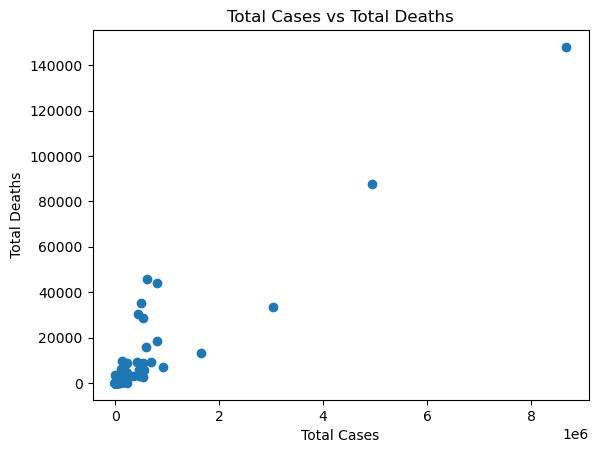

In [79]:
# 22. Scatter plot comparing total cases and total deaths
plt.scatter(df['Total_Cases'], df['Deaths'])
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.title('Total Cases vs Total Deaths')
plt.show()

In [81]:
# 23. Save dataset as CSV
df.to_csv('cleaned_dataset.csv', index=False)